In [2]:
from PIL import Image 
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
import random
import numpy as np
import os

In [3]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

In [4]:
__dirname = os.path.join(os.getcwd(),"images/test")
# print(__dirname)
iModel = load_model('my_model.h5')

In [45]:
def predict(filename):
    test_image = image.load_img(filename, target_size = (30,30))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = iModel.predict(test_image)
    test_image = np.squeeze(test_image)
    plt.imshow(test_image/255.)
    accuracy = np.nanmax(result)*100
    print(classes[result.argmax()+1])
    print("Accuracy: {:.2f} %".format(accuracy))
#     print(result)
#     print(result.argmax())
#     print(np.nanmax(result))
#     print(np.where(result == np.nanmax(result, axis = 1)))
#     print(result.loc[result[0].argmax(), "SignName"])

Keep right
Accuracy: 100.00 %


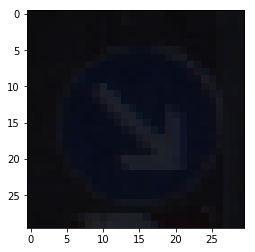

In [56]:
filename = random.choice(os.listdir(__dirname))
# print(os.path.join(__dirname,filename))
predict(os.path.join(__dirname,filename))